In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
import seaborn as sn
import matplotlib.pyplot as plt

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
data = pd.read_csv(r"C:\Users\Aryan\Desktop\Imperial Notes\Computing Challenge 2022\Crystal_structure.csv")
data

,Compound,A,B,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,Ac2O3,Ac,Ac,False,0,0,1.12,1.12,1.12,1.10,1.10,0.00000,0.000000,-3.248000,0.707107,-,0.800000,cubic
1,AcAgO3,Ac,Ag,False,0,0,1.12,1.12,0.95,1.10,1.93,0.00000,2.488353,-2.565071,0.758259,-,0.678571,orthorhombic
2,AcAlO3,Ac,Al,False,0,0,1.12,1.12,0.54,1.10,1.61,0.00000,1.892894,-1.846714,0.918510,-,0.385714,cubic
3,AcAsO3,Ac,As,False,0,0,1.12,1.12,0.52,1.10,2.18,0.00000,1.932227,-1.577429,0.928078,-,0.371429,orthorhombic
4,AcAuO3,Ac,Au,False,0,0,1.12,1.12,0.93,1.10,2.54,0.00000,2.313698,-2.279786,0.764768,-,0.664286,orthorhombic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,ZrWO3,Zr,W,False,1,5,0.89,0.72,0.62,1.33,2.36,2.38342,1.745600,-1.572214,0.801621,5.228952455,0.442857,cubic
5325,ZrYO3,Zr,Y,False,-,-,0.89,0.72,0.90,1.33,1.22,2.38342,2.235124,-2.489571,0.704032,-,0.642857,cubic
5326,ZrYbO3,Zr,Yb,False,-,-,0.89,0.72,0.95,1.33,1.10,2.38342,2.223981,-2.626821,0.689053,-,0.678571,orthorhombic
5327,ZrZnO3,Zr,Zn,False,-,-,0.89,0.72,0.74,1.33,1.65,2.38342,2.096141,-2.035750,0.756670,-,0.528571,cubic


A brief explanation of preprocessing:
1. Remove the NAN values for each rows. Anything with nan was removed.
2. Remove the columns compound, A , B, In literature, v(B), radius(B) they are not required
3. first remove 0, 4, 5, 6 values for the valence A since they are not theoretically possible
4. Use tG range 0.82 to 1.10
5. Use mu range from 0.414 to 0.732
6. Use FeatureScaling
7. One hot encoding of valence A 

explain why perovskite valence can only have certain values

['v(A)', 'r(AXII)(Å)', 'r(AVI)(Å)', 'r(BVI)(Å)', 'EN(A)', 'EN(B)', 'l(A-O)(Å)', 'l(B-O)(Å)', 'ΔENR', 'tG', 'τ', 'μ', 'Lowest distortion']
Lowest distortion
['v(A)', 'r(AXII)(Å)', 'r(AVI)(Å)', 'r(BVI)(Å)', 'EN(A)', 'EN(B)', 'l(A-O)(Å)', 'l(B-O)(Å)', 'ΔENR', 'tG', 'τ', 'μ']


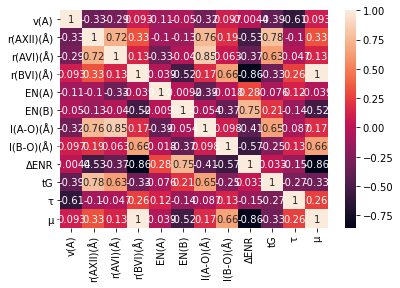

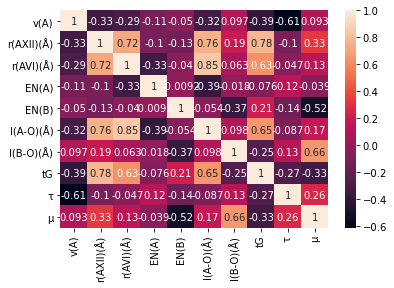

In [73]:

def stageOne(data):
    df=data.copy()
    df.replace({'-':np.nan}, inplace=True) 
    df=df.dropna()    #drop Nan Values
 
    df=df.copy().drop(["Compound","A","B","In literature","v(B)"], axis=1)
    df=df[ (df['tG']>= 0.82) & (df['tG'] <= 1.10)]
    df = df[(df['v(A)'] != '5') & (df['v(A)'] != '4') & (df['v(A)'] != '0')]
    #df=df[ (df['μ']>= 0.414) & (df['μ']<= 0.732) ]
    df= df[ (df['μ']>= 0.414)]
    columns = list(df.columns)
    print(columns)
    y_col = columns.pop(12)
    print(y_col)
    print(columns)
    # split column in X, y which are the input and output variables respectively
    y = df[y_col].to_numpy()
    X = df[columns].to_numpy()
    scaler = MinMaxScaler()
    df[columns]= scaler.fit_transform(df[columns])
    
    dorrMatrix = df.corr()
    sn.heatmap(dorrMatrix, annot=True)
    plt.show()
    
    # I want to talk about the correlation matrix here. the high correlation of 0.86 between Delta ENR and the mu factor
    # So it would make sense to remove it. But explaining in a comment like this is tedious. We can separate the code into
    # different cells so we can use Markdown to explain our justification better
    
    df=df.copy().drop(["ΔENR","r(BVI)(Å)"],axis=1)
    dorrMatrix = df.corr()
    sn.heatmap(dorrMatrix, annot=True)
    plt.show()
    # A comparison of some sort can be shown here for the 2 matrixes i guess. low values imply that the features are ready.
    # one hot encoding (idk how to use onehotencoding which is inbuilt in pandas)
    
    categorical_columns = ['v(A)']
    for column in categorical_columns:
        tempdf = pd.get_dummies(df[column], prefix=column)
    df = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)
        
    df=df.reset_index(drop=True)
    
    #print(max(df["tG"]))
    #print(max(df["μ"]))
    return df

df_pre=stageOne(data)


Now the preprocessing has been finished sort of. Might need to fine tune some things later. Classifiers will be used in the next few cells. Might use different classifiers and test them over different train and test split values.
    1. Logistic Regression (Use train and test split on the data)
    2. Support Vector classifier
    3. Random Forest
Train-Test split was done initially. high overfit was observed in the random forest possibly. Because i used cross validation after that to attain slightly lower values. However, overfitting was probably avoided by using k-fold and stratified k-fold. 


In [75]:
df_pre


,r(AXII)(Å),r(AVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),tG,τ,μ,Lowest distortion,v(A)_0.0,v(A)_0.5,v(A)_1.0
0,0.387755,0.314286,0.740260,0.730159,0.494922,0.632855,0.206526,0.579628,0.450,rhombohedral,1,0,0
1,0.387755,0.314286,0.740260,0.841270,0.494922,0.058835,0.442386,0.592154,0.075,cubic,1,0,0
2,0.387755,0.314286,0.740260,0.396825,0.494922,0.281998,0.392439,0.579622,0.150,rhombohedral,1,0,0
3,0.387755,0.314286,0.740260,0.634921,0.494922,0.326314,0.493846,0.609865,0.000,cubic,1,0,0
4,0.387755,0.314286,0.740260,0.753968,0.494922,0.444628,0.459367,0.597470,0.050,orthorhombic,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0.244898,0.314286,0.201299,0.349206,0.267856,0.245369,0.264963,0.626431,0.075,orthorhombic,0,1,0
645,0.244898,0.314286,0.201299,0.420635,0.267856,0.016747,0.313735,0.616744,0.000,orthorhombic,0,1,0
646,0.244898,0.314286,0.201299,1.000000,0.267856,0.000000,0.186833,0.666246,0.200,orthorhombic,0,1,0
647,0.244898,0.314286,0.201299,0.182540,0.267856,0.401449,0.097941,0.758633,0.350,orthorhombic,0,1,0


In [69]:
columns=list(df_pre.columns)
y_col = columns.pop(9)
y = df_pre[y_col].to_numpy()
X = df_pre[columns].to_numpy()
X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.3)

In [59]:

Lr=LogisticRegression()
Lr.fit(X_train,y_train)
Lr.score(X_test,y_test)

0.6564102564102564

In [60]:
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.7025641025641025

In [61]:
RF=RandomForestClassifier(n_estimators=65)
RF.fit(X_train,y_train)
RF.score(X_test,y_test)

0.7897435897435897

In [63]:
a=cross_val_score(Lr,X,y,cv=4)
a,a.mean()


(array([0.66871166, 0.71604938, 0.61111111, 0.64814815]), 0.6610050746042566)

In [64]:
cross_val_score(svm,X,y)

array([0.68461538, 0.65384615, 0.69230769, 0.67692308, 0.68217054])

In [65]:
a=cross_val_score(RF,X,y,cv=4)
a,a.mean()

(array([0.67484663, 0.7654321 , 0.66666667, 0.70987654]), 0.7042054836022116)

In [90]:
from sklearn.model_selection import StratifiedKFold
accuracy=[]
stk= StratifiedKFold(n_splits=10)
stk.get_n_splits(X,y)
for train_index, test_index in stk.split(X,y):
    X1_train, X1_test=X[train_index], X[test_index]
    y1_train, y1_test=y[train_index], y[test_index]
    RF.fit(X1_train,y1_train)
    prediction=RF.predict(X1_test)
    score=accuracy_score(prediction,y1_test)
    accuracy.append(score)

accuracy,np.array(accuracy).mean()



([0.5076923076923077,
  0.7692307692307693,
  0.8153846153846154,
  0.676923076923077,
  0.7846153846153846,
  0.7384615384615385,
  0.6307692307692307,
  0.6923076923076923,
  0.7230769230769231,
  0.6875],
 0.7025961538461538)

KEY THINGS ABOUT THE FIRST NOTEBOOK:
We should try out a couple of other classifiers because they're not that difficult to implement and might give some better result. A cross-validation can be done for whatever classifier chosen. I used the same concepts that were also used in the research paper we found. 